## Q.1) <font color='green'>Compute Fourier Transform of Const function using Python</font>

1. Write a Python code to compute the Fourier transform of the Const function:

   $$ f(x) = \begin{cases} \frac{\sin(x)}{x}, & \text{if } x \neq 0 \\ 1, & \text{otherwise} \end{cases} $$

   using NumPy. Make a plot comparing your numerical result with the analytical result.


In [1]:
import numpy as np
import matplotlib.pyplot as plt



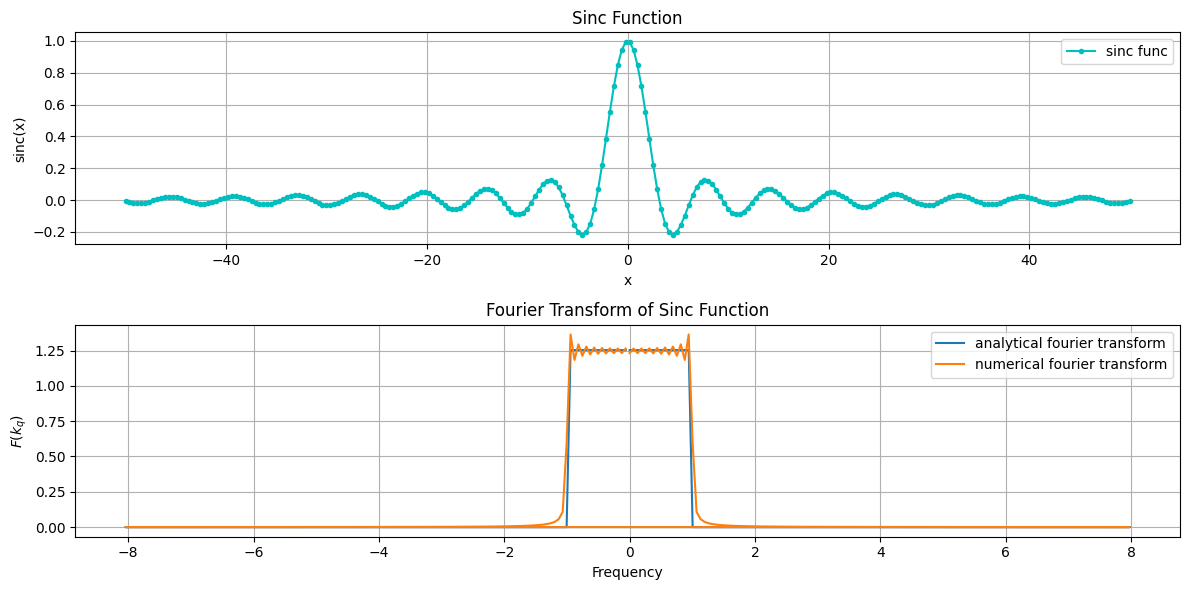

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
xmin = -50
xmax = 50
n = 256

# Create x values
x = np.linspace(xmin, xmax, n)

# Define sinc function
def sinc_func(x):
    return np.where(x == 0, 1, np.sin(x) / (x))

sinc_func = sinc_func(x)

#Normalized Analytical Fourier Transform        
def ft(k):
    return 0.5*np.sqrt(np.pi/2)* (np.sign(1 - k) + np.sign(1 + k))

# Compute Fourier transform
ft_sinc = np.fft.fft(sinc_func,norm='ortho')

# Frequency values
freq =2*np.pi* np.fft.fftfreq(n, d=(xmax-xmin)/n)

# Normalization factor
dx = (xmax - xmin) / (n)
norm_factor = dx*np.sqrt(n / (2 * np.pi))*np.exp(-1j*freq*xmin)

# Multiply Fourier transform by normalization factor
new_ft_sinc = ft_sinc*norm_factor

# Plot the sinc function and its Fourier transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, sinc_func,'c.-',label='sinc func')
plt.title('Sinc Function')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq,ft(freq),label='analytical fourier transform')
plt.plot(freq, np.abs(new_ft_sinc),label='numerical fourier transform')
plt.title('Fourier Transform of Sinc Function')
plt.xlabel('Frequency')
plt.ylabel(r'$F(k_{q})$')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


## Q.3)
a) Take n numbers and write a Python code to compute their DFT using direct computation, i.e., without using FFT. Now compute the same DFT using numpy.fft.fft.Measure the time taken by the two methods.
____________________________________________
b) Now change the number n over a wide range of values, say from 4 to 100, and repeat the exercise. Make a plot showing the time taken by the two DFT methods as a function of n

## (3)<font color='orange'> Part a </font>

In [63]:
import numpy as np
import time

# Define the size of input data
n = 20
n_numbers = np.random.rand(n)

# Measure execution time of FFT
start_time = time.perf_counter()
ft_by_fft = np.fft.fft(n_numbers, norm='ortho')
end_time = time.perf_counter()
fft_execution_time = end_time - start_time

# Define DFT matrix function
def dft_matrix(n):
    A = np.zeros((n, n), dtype=np.complex128)
    w = np.exp(-2j * np.pi / n)
    for i in range(n):
        for j in range(n):
            A[i, j] = w**(i * j)
    A/=np.sqrt(n)
    return A

# Compute DFT matrix
Dft_matrix = dft_matrix(n)

# Measure execution time of manual DFT calculation
start_time = time.perf_counter()
ft_by_hand = np.dot(Dft_matrix, n_numbers)
end_time = time.perf_counter()
hand_execution_time = end_time - start_time

# print(ft_by_fft)
# print(ft_by_hand)

print("Execution time of FFT:", fft_execution_time)
print("Execution time of manual DFT calculation:", hand_execution_time)


Execution time of FFT: 0.00019099999917671084
Execution time of manual DFT calculation: 0.0001317000060225837


## (3) <font color='orange'> Part b </font>

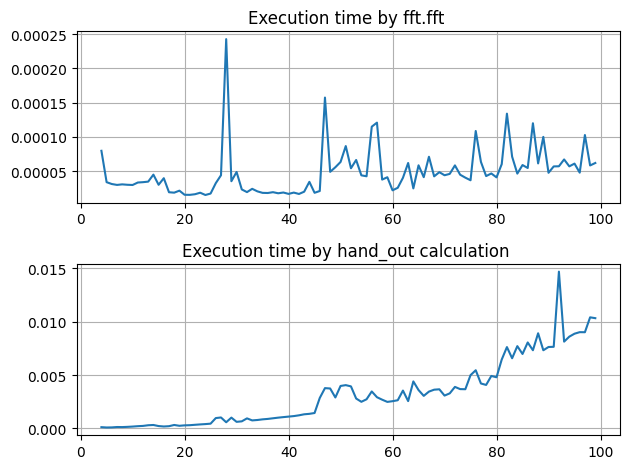

In [56]:
import numpy as np
import matplotlib.pyplot as plt

n_array=np.zeros(96)
fft_execution_time_array=np.zeros(96)
hand_execution_time_array=np.zeros(96)

def dft_matrix(n):
    A = np.zeros((n, n), dtype=np.complex128)
    w = np.exp(-2j * np.pi / n)
    for i in range(n):
        for j in range(n):
            A[i, j] = w**(i * j)
    A/=np.sqrt(n)
    return A



for n in range(4,100):
    n_array[n-4]=n
    n_numbers=np.random.rand(n)
    # Measure execution time of FFT
    start_time = time.perf_counter()
    ft_by_fft = np.fft.fft(n_numbers, norm='ortho')
    end_time = time.perf_counter()
    fft_execution_time_array[n-4] = end_time - start_time

    

    # Measure execution time of manual DFT calculation
    start_time = time.perf_counter()
    Dft_matrix = dft_matrix(n)
    ft_by_hand = np.dot(Dft_matrix, n_numbers)
    end_time = time.perf_counter()
    hand_execution_time_array[n-4] = end_time - start_time

# print(fft_execution_time_array)
# print(hand_execution_time_array)
fig,ax=plt.subplots(2)

ax[0].plot(n_array,fft_execution_time_array)
ax[0].set_title('Execution time by fft.fft ')
ax[0].grid()
ax[1].plot(n_array,hand_execution_time_array)
ax[1].set_title('Execution time by hand_out calculation ')
ax[1].grid()
plt.tight_layout()


    


C:\Users\supri\AppData\Local\Temp\ipykernel_17180\2624881873.py:30: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.plot_surface(k_x[:, np.newaxis], k_y[np.newaxis, :], np.abs(F_uv), cmap='viridis')


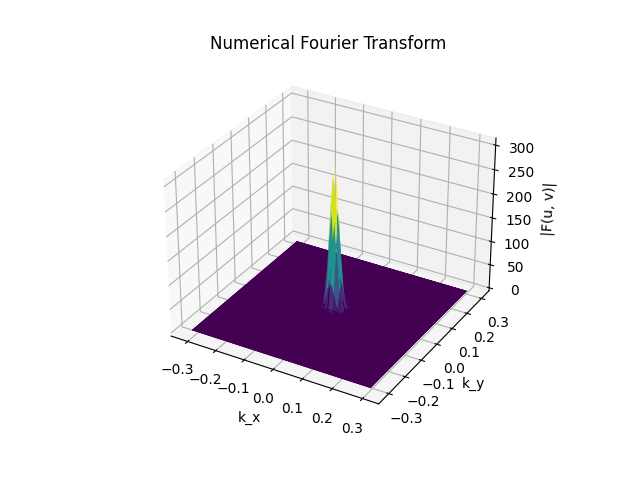

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian function f(x, y)
def gaussian_function(x, y):
    return np.exp(-(x**2 + y**2))

# Create a grid of points (adjust the size and spacing as needed)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussian function at the grid points
f_xy = gaussian_function(X, Y)

# Compute the 2D FFT
F_uv = np.fft.fft2(f_xy)

# Compute the corresponding k-points (spatial frequencies)
L_x = x[-1] - x[0]
L_y = y[-1] - y[0]
k_x = 2 * np.pi * np.fft.fftfreq(len(x), d=L_x)
k_y = 2 * np.pi * np.fft.fftfreq(len(y), d=L_y)

# Create a three-dimensional plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_x[:, np.newaxis], k_y[np.newaxis, :], np.abs(F_uv), cmap='viridis')
ax.set_title("Numerical Fourier Transform")
ax.set_xlabel("k_x")
ax.set_ylabel("k_y")
ax.set_zlabel("|F(u, v)|")
plt.show()


## Q6). Write a Python code to compute the Fourier transform of a constant function

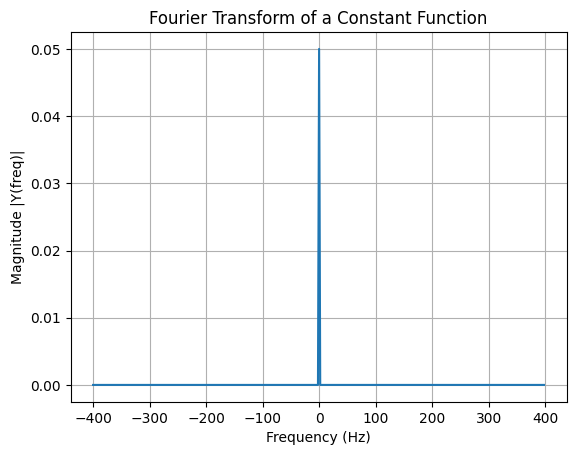

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Define the constant function (e.g., f(x) = 1 for all x)
def constant_function(x):
    return np.ones_like(x)  # Replace with your specific constant value

# Create an array of x values
N = 400
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N, endpoint=False)

# Evaluate the constant function
y = constant_function(x)

# Compute the Fourier transform
yf = np.fft.fft(y,norm='ortho')
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

# Plot the magnitude of the Fourier transform
plt.plot(xf, 1.0 / N * np.abs(yplot))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude |Y(freq)|')
plt.title('Fourier Transform of a Constant Function')
plt.show()


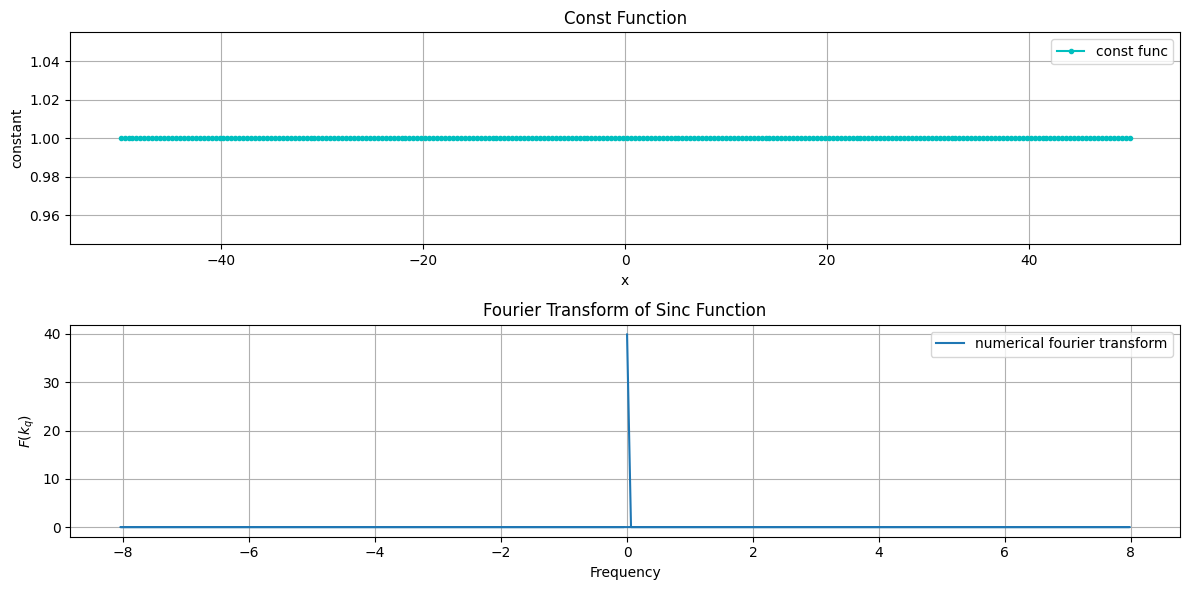

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
xmin = -50
xmax = 50
n = 256

# Create x values
x = np.linspace(xmin, xmax, n)


def constant_function(x):
    return np.ones_like(x)  # Replace with your specific constant value

const=constant_function(x)

#Normalized Analytical Fourier Transform        
def ft(k):
    return 0.5*np.sqrt(np.pi/2)* (np.sign(1 - k) + np.sign(1 + k))

# Compute Fourier transform
ft_const = np.fft.fft(const,norm='ortho')

# Frequency values
freq =2*np.pi* np.fft.fftfreq(n, d=(xmax-xmin)/n)

# Normalization factor
dx = (xmax - xmin) / (n)
norm_factor = dx*np.sqrt(n / (2 * np.pi))*np.exp(-1j*freq*xmin)

# Multiply Fourier transform by normalization factor
new_ft_const = ft_const*norm_factor

# Plot the sinc function and its Fourier transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, const,'c.-',label='const func')
plt.title('Const Function')
plt.xlabel('x')
plt.ylabel('constant')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
#plt.plot(freq,ft(freq),label='analytical fourier transform')
plt.plot(freq, np.abs(new_ft_const),label='numerical fourier transform')
plt.title('Fourier Transform of Sinc Function')
plt.xlabel('Frequency')
plt.ylabel(r'$F(k_{q})$')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


## Q.11)
Write a Python code to compute the convolution of the box function
$$ f(x) = \begin{cases} 
1 & \text{if } -1 < x < 1 \\
0 & \text{otherwise} 
\end{cases} $$
with itself. Make a plot that shows the result as well as the above box function.


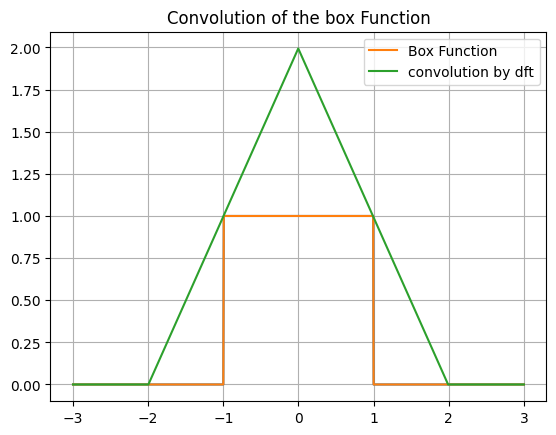

In [57]:
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    return np.where(np.logical_and(-1 < x, x < 1), 1, 0)

xp = np.linspace(-3, 3, 1000)
dx=xp[1]-xp[0]
plt.plot(xp, f(xp))

def convolution(f,g):
    f_dft=np.fft.fft(f(xp),norm='ortho')
    g_dft=np.fft.fft(g(xp),norm='ortho')

    g_dft_shifted = np.fft.fftshift(g_dft)
    f_dft_shifted = np.fft.fftshift(f_dft)
    convolve=np.fft.ifftshift(np.abs(np.fft.ifft(f_dft_shifted *g_dft_shifted ,norm='ortho')))*dx*np.sqrt(len(xp))
    return convolve
convolution_dft=convolution(f,f)

plt.plot(xp,f(xp),label='Box Function')
plt.plot(xp,convolution_dft,label='convolution by dft')
plt.grid()
plt.legend()
plt.title("Convolution of the box Function")
plt.show()






### Q12) Compute the Convolution of Two Functions

Compute the convolution of the following two functions:

$$ g(x) = e^{-x^2} \quad \text{and} \quad h(x) = e^{-4x^2} $$

1. **Analytical Calculation**:

   Compute the convolution analytically.

2. **Numerical Calculation via DFT**:

   Compute the convolution of the functions \( g(x) \) and \( h(x) \) using the Discrete Fourier Transform (DFT) with any library of your choice.

After both analytical and numerical computations are done, make a plot to show that the analytical calculation agrees with its numerical counterpart.


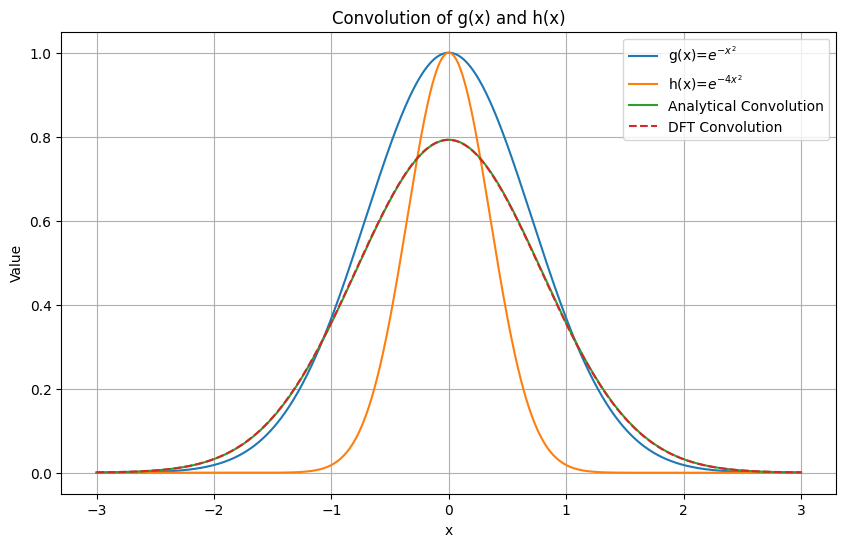

In [67]:
import numpy as np 
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-x**2)
def h(x):
    return np.exp(-4*x**2)
def analytical_convolution(x):
    return np.sqrt(np.pi/5) * np.exp(-4*x**2/5)


xp = np.linspace(-3, 3, 1000)
dx=xp[1]-xp[0]


def convolution(f,g):
    f_dft=np.fft.fft(f(xp),norm='ortho')
    g_dft=np.fft.fft(g(xp),norm='ortho')

    g_dft_shifted = np.fft.fftshift(g_dft)
    f_dft_shifted = np.fft.fftshift(f_dft)
    convolve=np.fft.ifftshift(np.abs(np.fft.ifft(f_dft_shifted *g_dft_shifted ,norm='ortho')))*dx*np.sqrt(len(xp))
    return convolve
convolution_dft=convolution(g,h)

plt.figure(figsize=(10, 6))
plt.plot(xp, g(xp), label='g(x)=$e^{-x^2}$')
plt.plot(xp, h(xp), label='h(x)=$e^{-4x^2}$')
plt.plot(xp, analytical_convolution(xp), label='Analytical Convolution')
plt.plot(xp, convolution_dft, label='DFT Convolution', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Convolution of g(x) and h(x)')
plt.legend()
plt.grid(True)
plt.show()



